Merge “articleInfo.csv” and “authorInfo.csv” into one data frame based on “Article
No.”, fill all empty cells with the value of 0, and answer the following questions

In [1]:
import pandas as pd

df1 = pd.read_csv('articleInfo.csv')
df2 = pd.read_csv('authorInfo.csv')
df3 = pd.merge(df1, df2, on="Article No.")
df3.fillna(0, inplace=True)
print(df3)

df3.to_csv('merged.csv', index=False)

     Article No.                                              Title  Year  \
0              1  Study of Virtual Reality Immersive Technology ...  2022   
1              1  Study of Virtual Reality Immersive Technology ...  2022   
2              1  Study of Virtual Reality Immersive Technology ...  2022   
3              2  Factors Influencing Nursing Students' Immersiv...  2021   
4              2  Factors Influencing Nursing Students' Immersiv...  2021   
..           ...                                                ...   ...   
383           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
384           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
385           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
386           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
387           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   

     Author Number                                          Key Words  \
0 

1. Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is
the number of articles published during that year.

Text(0, 0.5, 'No. of Articles')

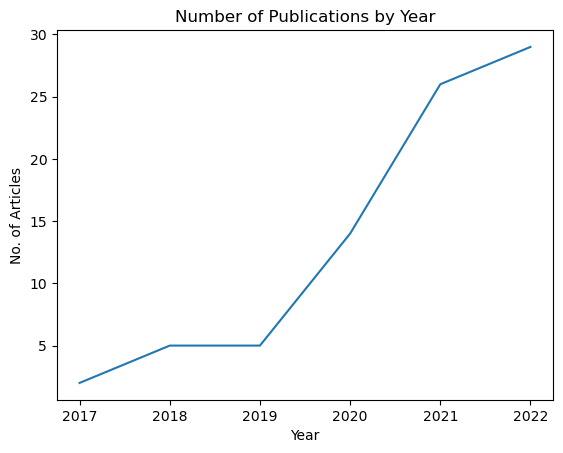

In [2]:
df = df3.drop_duplicates(subset='Article No.', ignore_index=True).groupby('Year').count()['Article No.']
yearly_publication = df.plot()
yearly_publication.set_title('Number of Publications by Year')
yearly_publication.set_xlabel('Year')
yearly_publication.set_ylabel('No. of Articles')

2. Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the
total number of citations during that year.

Text(0, 0.5, 'No. of Citations')

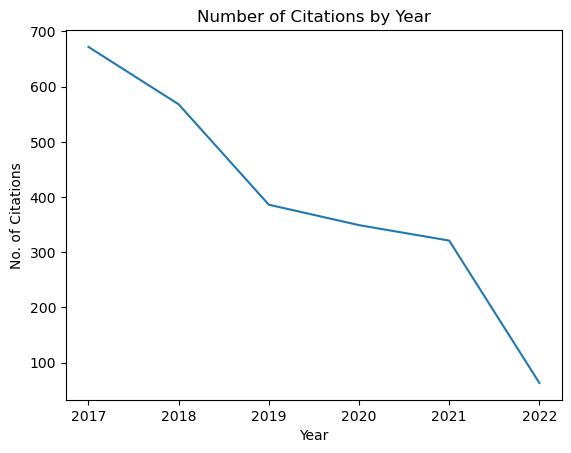

In [3]:
df = df3.drop_duplicates(subset='Article No.', ignore_index=True).groupby('Year').sum()['Citation']
yearly_citation = df.plot()
yearly_citation.set_title('Number of Citations by Year')
yearly_citation.set_xlabel('Year')
yearly_citation.set_ylabel('No. of Citations')

3. Plot the figure of the number of publications across countries. You may use
any available python libraries, such as pygal_maps_world, geopandas, or
others.

<AxesSubplot:>

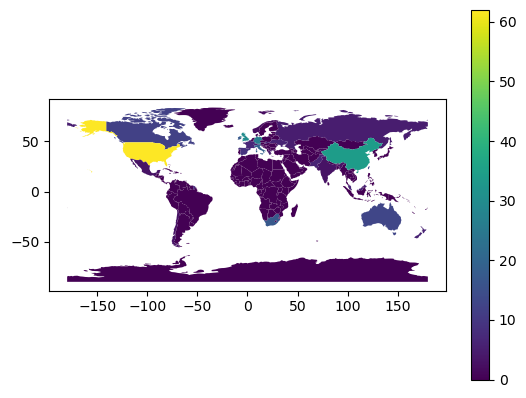

In [4]:
import geopandas as gp

countries = df3.groupby('Country').count()['Title'].drop(0)
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
countries.rename(index={'USA':'United States of America'}, inplace=True)
world = world.merge(countries, left_on='name', right_on='Country', how='left')
world.fillna(0, inplace=True)
world.plot(column='Title', legend=True)

4. What are the top 5 institutions that have the most published articles in this
area?

In [5]:
institutes = pd.DataFrame(df3.groupby('Author Affiliation').count()['Author Name'].sort_values(ascending=False))
institutes.rename(columns={'Author Affiliation':'Institute', 'Author Name':'Publications'})
institutes.head(5)

,Author Name
Author Affiliation,
University of the Western Cape,17
Masaryk University,12
Intel Corporation,11
University College Cork,11
Madigan Army Medical Center,8


5. Who are the top 5 researchers that have the most h-index in this area?

In [6]:
researchers = df3.sort_values(by='h-index', ascending=False)
researchers = researchers[['Author Name', 'h-index']]
researchers.head(5)

,Author Name,h-index
117,Ulrich Trautwein,95.0
102,Nicolas Molinari,63.0
130,George S. Athwal,59.0
140,Maria Luisa Lorusso,33.0
147,Vicente A. González,33.0
